# Swan Teleco project

In [3]:
# The Big 4
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Model performance metrics
from sklearn import metrics
from time import time

# Sklearn model tools
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ensemble models
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

In [4]:
df = pd.read_csv("1 - Project Data.csv")

In [5]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [25]:
df['City'].unique()

array(['Los Angeles', 'Beverly Hills', 'Huntington Park', ..., 'Standish',
       'Tulelake', 'Olympic Valley'], dtype=object)

In [6]:
df.shape

(7043, 31)

In [7]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [8]:
# Mapping columns to get binary results
def columns_binary(x):
    if x == 'Yes':
        return 1
    else:
        return 0

def feature_eng(df):
    # Drop non-useful columns
    df = df.drop(columns = ['CustomerID', 'Country', 'State', 'Churn Label'], axis = 1) # We already have Churn Value which is already a numerical
    
    
    # Churn reason column -- Handle nulls
    df['Churn Reason'] = df['Churn Reason'].fillna('Did not churn')
    
    
    # Change yes/no(including: No internet/Phone services) to binary
    df['Senior Citizen'] = df['Senior Citizen'].apply(columns_binary)
    df['Partner'] = df['Partner'].apply(columns_binary)
    df['Dependents'] = df['Dependents'].apply(columns_binary)
    df['Phone Service'] = df['Phone Service'].apply(columns_binary)
    df['Multiple Lines'] = df['Multiple Lines'].apply(columns_binary)
    df['Online Security'] = df['Online Security'].apply(columns_binary)
    df['Device Protection'] = df['Device Protection'].apply(columns_binary)
    df['Online Backup'] = df['Online Backup'].apply(columns_binary)
    df['Tech Support'] = df['Tech Support'].apply(columns_binary)
    df['Streaming TV'] = df['Streaming TV'].apply(columns_binary)
    df['Streaming Movies'] = df['Streaming Movies'].apply(columns_binary)
    df['Paperless Billing'] = df['Paperless Billing'].apply(columns_binary)

    # Changing columns with only two results to numericals
    df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})
    
    # OHE columns
    df = pd.get_dummies(df, columns = ['Internet Service'], drop_first = True, prefix = 'Internet Service', dtype=int)
    df = pd.get_dummies(df, columns = ['Contract'], drop_first = True, prefix = 'Contract', dtype=int)
    df = pd.get_dummies(df, columns = ['Payment Method'], drop_first = True, prefix = 'Payment Method', dtype=int)
    df = pd.get_dummies(df, columns = ['Churn Reason'], drop_first = True, prefix = 'Churn Reason', dtype=int)
    
    # Scaling 
    # continuous_cols = ['Monthly Charges', 'Total Charges', 'Tenure Months']
    # Standard
    # df[continuous_cols] = scaler_standard.fit_transform(df[continuous_cols])
    # Min-Max Scaling
    # df['continuous_cols'] = scaler_minmax.fit_transform(df['continuous_cols'])
    # Robust
    # df['continuous_cols'] = scaler_robust.fit_transform(df['continuous_cols'])

    
    
    # Upscale / Downscale data to get a balanced churn/non-churned split
    
    
    
    return df

In [9]:
feature_eng(df)
df.info() # Should have no nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   int64  
 10  Senior Citizen     7043 non-null   int64  
 11  Partner            7043 non-null   int64  
 12  Dependents         7043 non-null   int64  
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   int64  
 15  Multiple Lines     7043 non-null   int64  
 16  Internet Service   7043 

In [10]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,1,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,1,...,1,1,Month-to-month,1,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,1,...,1,1,Month-to-month,1,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,0,...,1,1,Month-to-month,1,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


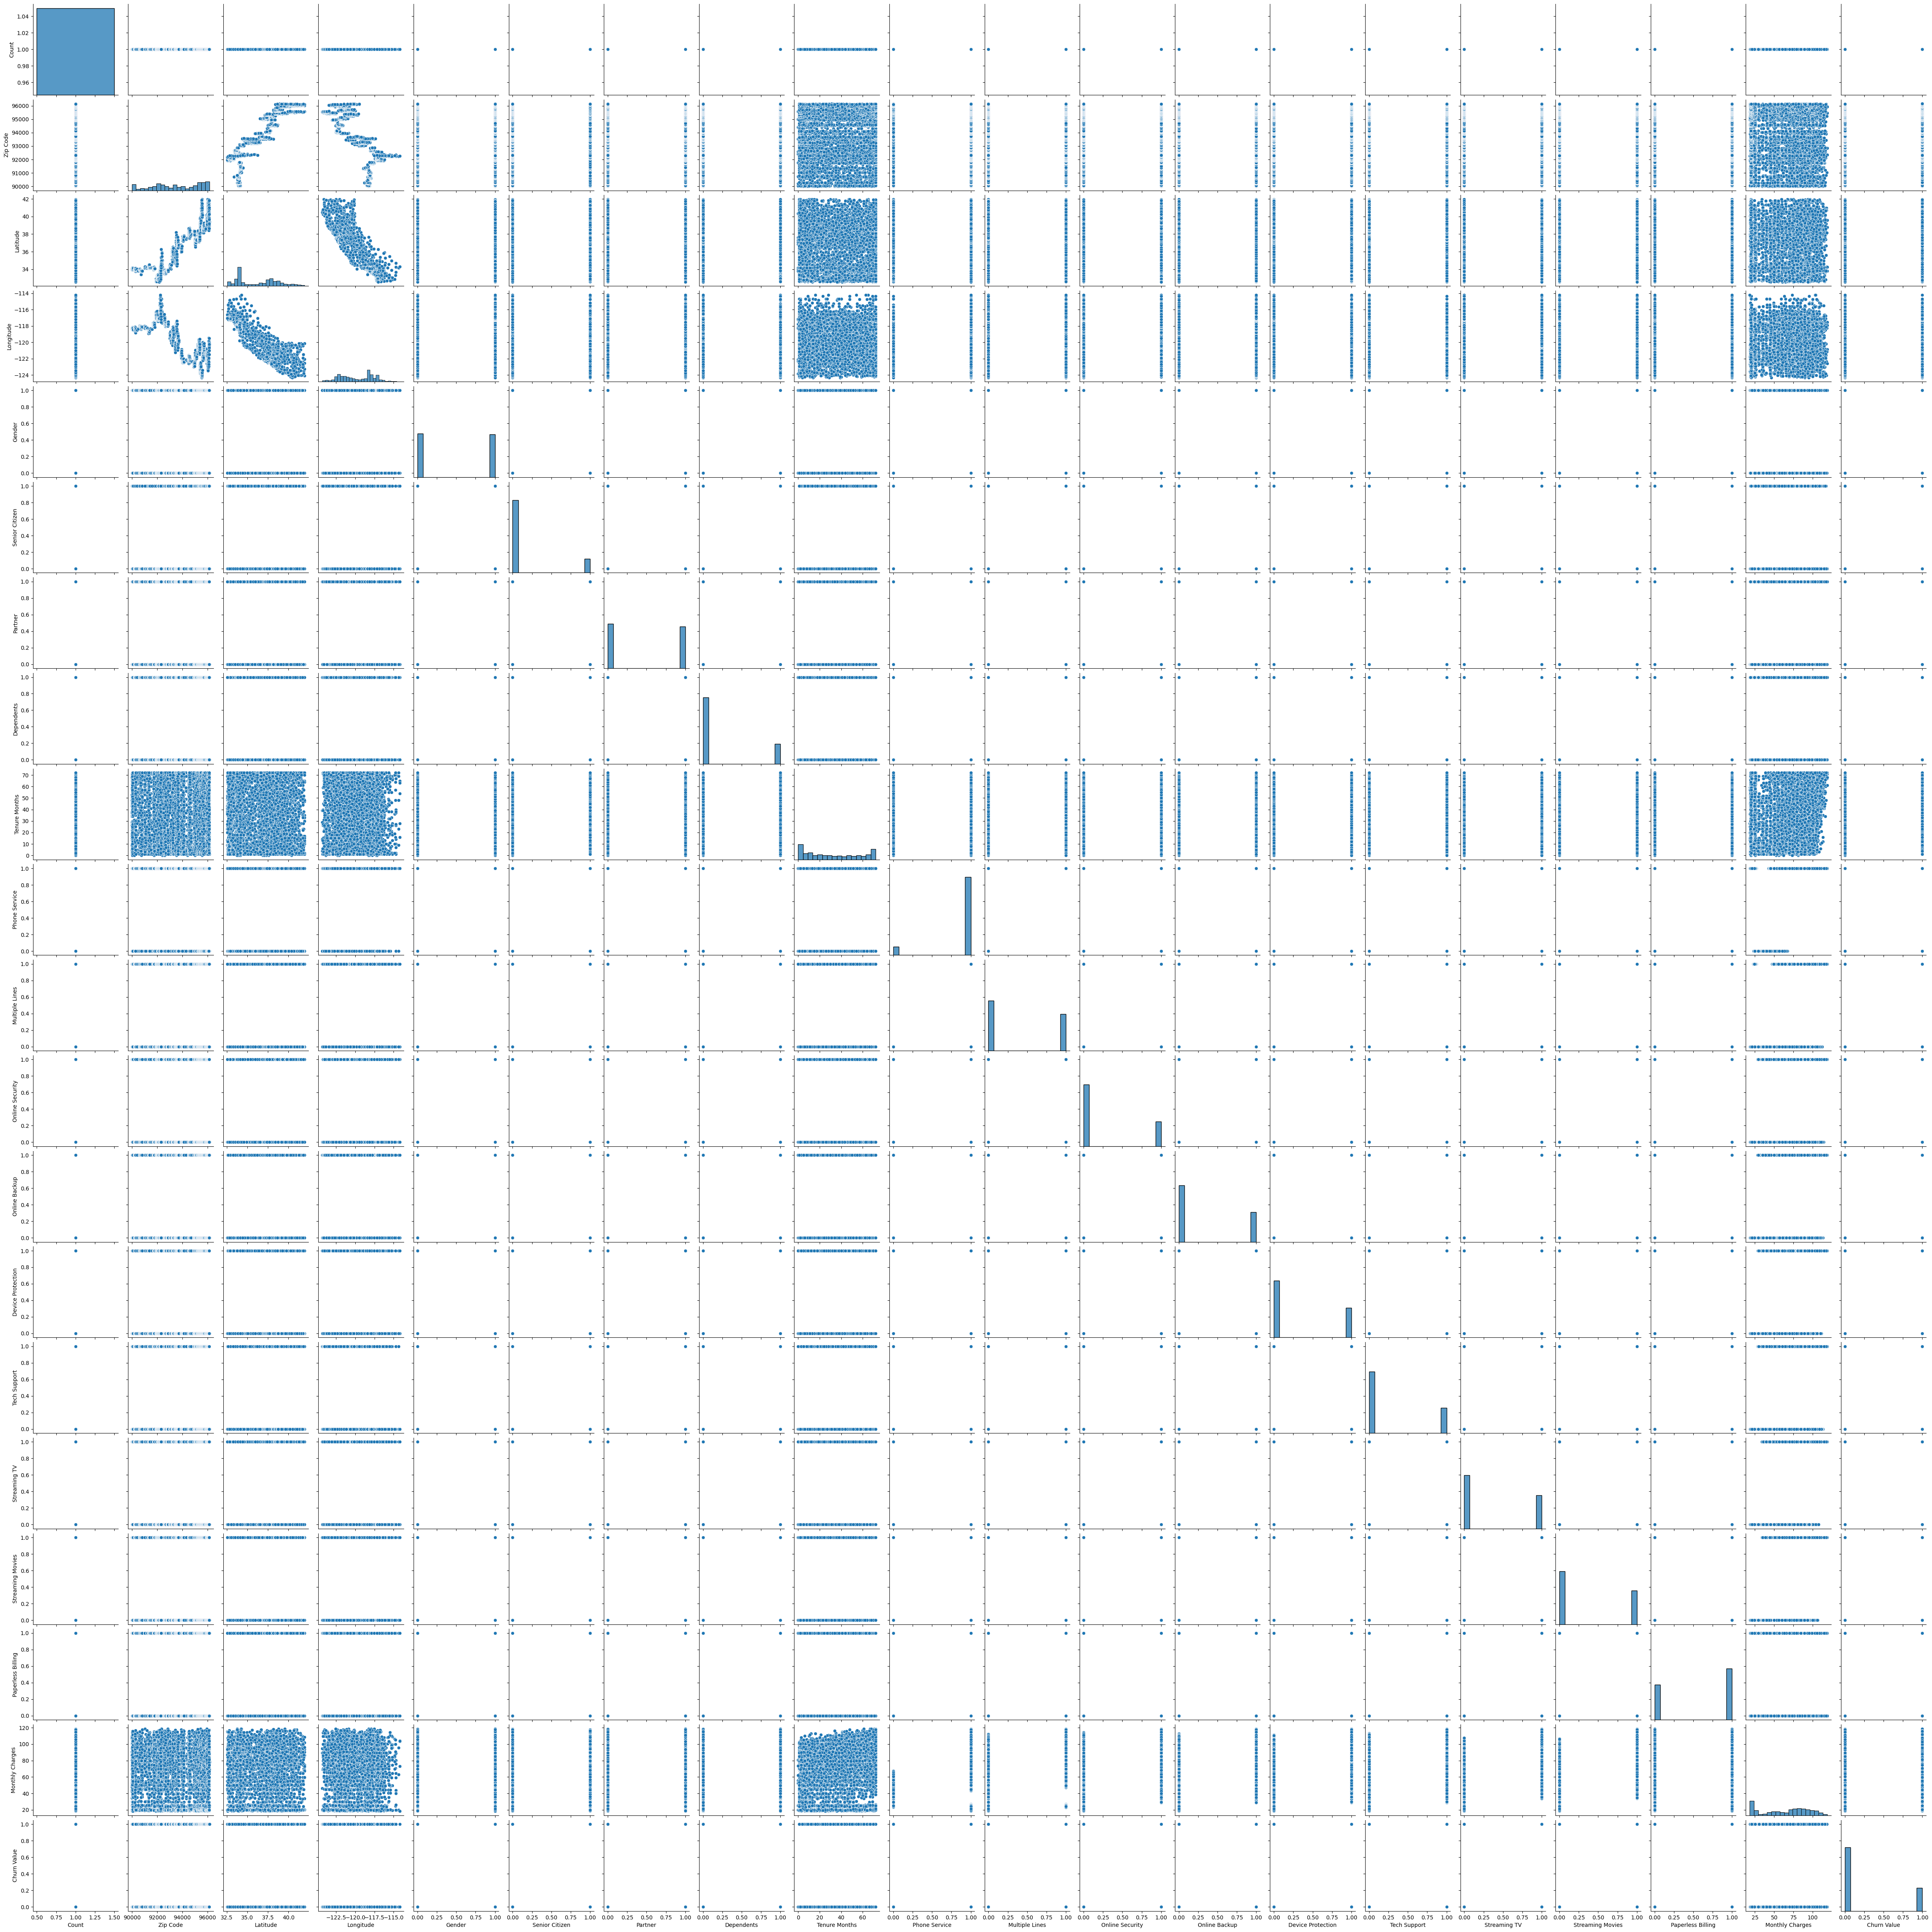

In [11]:
sns.pairplot(df)
plt.show()